# **Image Classification**

Sayak Mondal 24BCE0884

IEEE-CS Recruitments Task 2025

In this task, we are doing a Explorative Data Analysis, create a Basic Classification model of Supervised Machine Learning methods using Logistic Regression and design and train a Neural Network Architecture to classify images based on clothing/fashion

###**Step 0: Import the necessary libraries**

Importing the necessary libraries for the project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.preprocessing as pre

### **Step 1: The Dataset**

Let's start first with the dataset we have been given of 70000 grayscale images of fashion items for clothing classification from the images.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
datapath = "/content/drive/My Drive/data.csv"
data=pd.read_csv(datapath)
print(data)

Mounted at /content/drive
       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9

###**Step 2: Explorative Data Analysis (Task 1)**

Performing analysis here

#####Displaying the images

Images : 


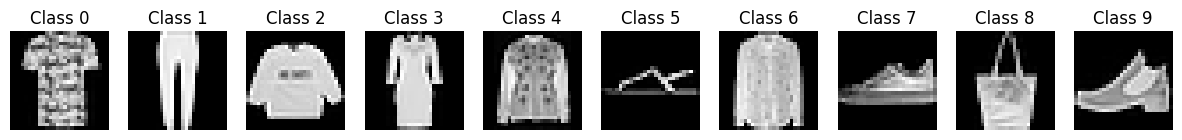

In [3]:
print("Images : ")
num_classes = data.iloc[:, 0].nunique() #Counts the number of unique class labels in the first column of data
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))
for i in range(num_classes):
    sample = data[data.iloc[:, 0] == i].iloc[0, 1:].values.reshape(28, 28)  # Reshape for visualization
    axes[i].imshow(sample, cmap='gray')
    axes[i].set_title(f"Class {i}")
    axes[i].axis("off")
plt.show()

#####Basic Info and Summary Statistics for pixel values to comprehend data characteristics.

In [4]:
print("Summary Stats : ")
print(data.iloc[:, 1:].describe())

Summary Stats : 
             pixel1        pixel2        pixel3        pixel4        pixel5  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000900      0.006150      0.035333      0.101933      0.247967   
std        0.094689      0.271011      1.222324      2.452871      4.306912   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    226.000000    164.000000    227.000000   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.411467      0.805767      2.198283      5.682000     14.488767   
std        5.836188      8.215169 

#####Data Visualisation (if you want data distribution for each label)

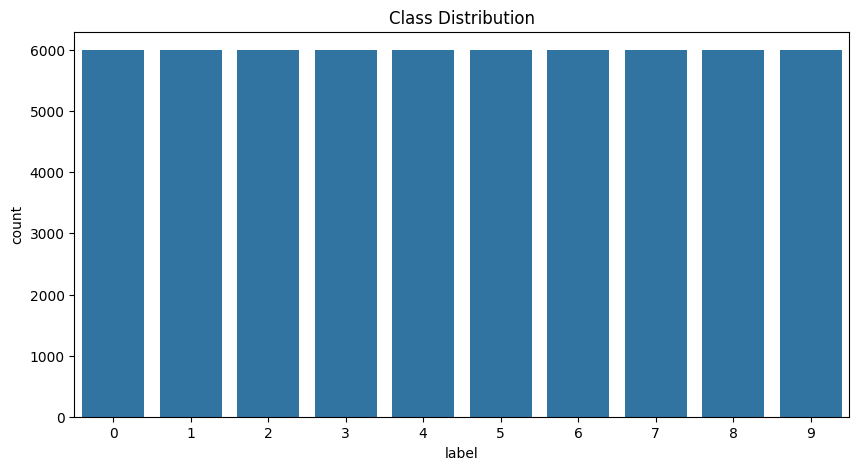

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data.iloc[:, 0])  # first column is the label
plt.title("Class Distribution")
plt.show()

### **Step 3: Creating a Basic Classification Model using Logistic Regression (Task 2)**

Logistic Regression is a type of Supervised Classification Machine Learning Model, in which the dependent variable (a categorical variable with two or more possible outcomes) is categorical with binary values and we find the probablity between 0 and 1, through a sigmoid function curve σ(z)=1/(1+e^(-z)), where if σ(z) tends to 1, z tends to ∞ and if σ(z) tends to 0, z tends to -∞.

####Data Preprocessing

Identifying the required columns and Normalising the data using Min-Max Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

x = data.iloc[:, 1:].values  # Features (pixel values) ,i.e., columns from second column ('1:')
y = data.iloc[:, 0].values   # Labels (class numbers) ,i.e., first column ('0')
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)

The Logistic Regression model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_scale = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2, random_state=42,stratify=y)
lr=LogisticRegression(max_iter=500) #more iteration  means better convergence
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Evaulation Metrics

Model Accuracy: 0.8532
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1200
           1       0.97      0.97      0.97      1200
           2       0.76      0.76      0.76      1200
           3       0.85      0.87      0.86      1200
           4       0.76      0.80      0.78      1200
           5       0.94      0.93      0.93      1200
           6       0.65      0.59      0.62      1200
           7       0.91      0.94      0.92      1200
           8       0.95      0.94      0.94      1200
           9       0.95      0.94      0.94      1200

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Confusion Matrix : 


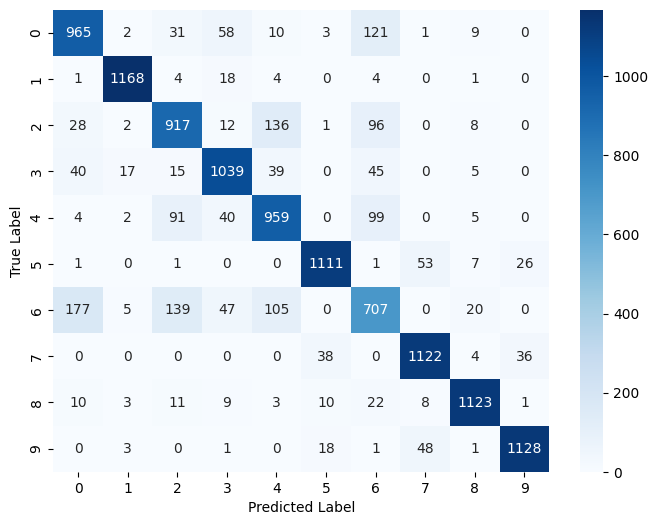

In [8]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report : ")
print(classification_report(y_test, y_pred))
print("Confusion Matrix : ")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###**Step 4: Neural Network Implementation (Task 3)**

Developing a simple Neural Network to classify images. We will use tensorflow

In [9]:
#the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [10]:
# Splitting data
train_df = data.sample(frac=0.75, random_state=4)
val_df = data.drop(train_df.index)

# Bring the data to range (0,1) for better performance
min_val = train_df.min(axis=0)
max_val = train_df.max(axis=0)
range_val = max_val - min_val
train_df = (train_df - min_val) / range_val
val_df = (val_df - min_val) / range_val

In [11]:
#Splitting and One-Hot Encoding
X_train = train_df.drop('label', axis=1).to_numpy()
X_val = val_df.drop('label', axis=1).to_numpy()
y_train = train_df['label'].to_numpy()
y_val = val_df['label'].to_numpy()
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [12]:
# Define the model
input_shape = [X_train.shape[1]]
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax') # FIXED: Use softmax for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train the model
nn = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=256, epochs=15)

Epoch 1/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9098 - loss: 0.3377 - val_accuracy: 0.9831 - val_loss: 0.0472
Epoch 2/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9839 - loss: 0.0426 - val_accuracy: 0.9877 - val_loss: 0.0367
Epoch 3/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9886 - loss: 0.0331 - val_accuracy: 0.9895 - val_loss: 0.0294
Epoch 4/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9912 - loss: 0.0253 - val_accuracy: 0.9888 - val_loss: 0.0324
Epoch 5/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9912 - loss: 0.0255 - val_accuracy: 0.9877 - val_loss: 0.0337
Epoch 6/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9920 - loss: 0.0238 - val_accuracy: 0.9853 - val_loss: 0.0392
Epoch 7/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9928 - loss: 0.0196 - val_accuracy: 0.9915 - val_loss: 0.0249
Epoch 8/15
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9931 - loss: 0.0185 - val_accuracy: 0

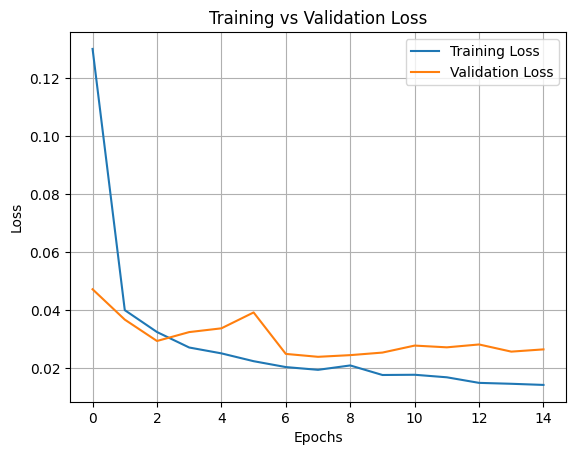

In [14]:
#Training vs Loss curve of the NN
plt.plot(nn.history['loss'], label='Training Loss')
plt.plot(nn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()